# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low= -90, high = 90, size=1500)
lngs = np.random.uniform(low = -180, high= 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [89]:
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"
query_url = url + "appid="+ api_key + "&units=" + units + "&q="

record = 0
set = 1

weather_cities = []
lat = []
lng =[]
temp_max =[]
humidity =[]
speed = []
date = []
cloudiness = []
country = []

for city in cities: 
    response = requests.get(query_url+city).json()
#     print(response)
    if record < 50:
        record += 1
    else:
        set += 1
        record = 0

    print(f"Processed record {record} set {set} | {city}")
    print(query_url)
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        weather_cities.append(city)
      
    except: 
        print(f"City not found: {city}")
        pass
print("Data Retrieval Complete")



Processed record 1 set 1 | umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 2 set 1 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 3 set 1 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
City not found: samusu
Processed record 4 set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 5 set 1 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 6 set 1 | karaul
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
City not found: karaul
Processed record 7 set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf

Processed record 7 set 2 | newport
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 8 set 2 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
City not found: mys shmidta
Processed record 9 set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 10 set 2 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 11 set 2 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 12 set 2 | trofors
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 13 set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&uni

Processed record 15 set 3 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 16 set 3 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 17 set 3 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 18 set 3 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 19 set 3 | korla
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 20 set 3 | galle
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 21 set 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 2

Processed record 22 set 4 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 23 set 4 | bilma
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 24 set 4 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 25 set 4 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 26 set 4 | east london
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 27 set 4 | nokaneng
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 28 set 4 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=

Processed record 30 set 5 | fethiye
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 31 set 5 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 32 set 5 | porto novo
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 33 set 5 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
City not found: kamenskoye
Processed record 34 set 5 | khonuu
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
City not found: khonuu
Processed record 35 set 5 | margate
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 36 set 5 | zaozhuang
http://api.openweathermap.org/data/2.5/weather?appid=ed7b26108

Processed record 36 set 6 | porto murtinho
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 37 set 6 | nanga eboko
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 38 set 6 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 39 set 6 | trincomalee
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 40 set 6 | am timan
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 41 set 6 | kasempa
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 42 set 6 | rochegda
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
P

Processed record 44 set 7 | skelleftea
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 45 set 7 | mongoumba
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 46 set 7 | lufkin
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 47 set 7 | amapa
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 48 set 7 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 49 set 7 | neulengbach
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 50 set 7 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q

Processed record 0 set 9 | selfoss
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 1 set 9 | kununurra
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 2 set 9 | kurchum
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 3 set 9 | kushiro
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 4 set 9 | general pico
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 5 set 9 | iquitos
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 6 set 9 | andenes
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 7 s

Processed record 6 set 10 | lyskovo
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 7 set 10 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 8 set 10 | mocuba
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 9 set 10 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 10 set 10 | tigil
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 11 set 10 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 12 set 10 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Proces

http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 13 set 11 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 14 set 11 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 15 set 11 | wajima
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 16 set 11 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 17 set 11 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 18 set 11 | ust-omchug
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 19 set 11 | kalmunai
htt

Processed record 19 set 12 | tomatlan
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 20 set 12 | isla mujeres
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 21 set 12 | hillsborough
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 22 set 12 | minggang
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 23 set 12 | tabarqah
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
City not found: tabarqah
Processed record 24 set 12 | moron
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf4baef&units=Imperial&q=
Processed record 25 set 12 | haibowan
http://api.openweathermap.org/data/2.5/weather?appid=ed7b2610844948bfa4c8ea36ccf

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
#date format to be corrected
correct_date = [] 
for day in date:
    correct_date.append(
        datetime.datetime.fromtimestamp(int(day)).strftime('%m/%d/%Y'))
correct_date[0:5]


weather = pd.DataFrame({"City": weather_cities,
                        "Lat": lat,
                        "Lng": lng,
                        "Max_Temp": temp_max,
                        "Humidity": humidity,
                        "Speed": speed,
                        "Date": correct_date,
                        "Cloudiness": cloudiness,
                        "Country": country})
weather

,City,Lat,Lng,Max_Temp,Humidity,Speed,Date,Cloudiness,Country
0,umm lajj,25.0213,37.2685,82.06,55,4.36,04/24/2021,0,SA
1,mount gambier,-37.8333,140.7667,50.00,100,8.05,04/24/2021,75,AU
2,vaini,-21.2000,-175.2000,69.80,100,6.22,04/24/2021,20,TO
3,kirakira,-10.4544,161.9205,78.82,82,1.68,04/24/2021,99,SB
4,tasiilaq,65.6145,-37.6368,37.40,75,4.61,04/24/2021,75,GL
...,...,...,...,...,...,...,...,...,...
571,blagoyevo,63.3667,47.9167,46.96,64,7.11,04/24/2021,34,RU
572,camana,-16.6228,-72.7111,71.02,71,9.80,04/24/2021,86,PE
573,krutinka,56.0055,71.5113,41.77,50,9.35,04/24/2021,100,RU
574,maniwaki,46.3834,-75.9660,66.20,26,10.36,04/24/2021,44,CA


In [98]:
weather.to_csv("Output_Data/weather.csv", encoding="utf-8",index=False)

In [100]:
weather.describe()

,Lat,Lng,Max_Temp,Humidity,Speed,Cloudiness
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,21.689187,17.382796,61.185764,66.930556,8.152656,55.819444
std,33.224340,87.567710,20.849406,23.647602,5.312789,36.879763
min,-54.800000,-179.166700,-15.030000,5.000000,0.310000,0.000000
25%,-5.951275,-54.650125,47.005000,51.000000,4.175000,20.000000
50%,27.154650,20.699400,64.400000,72.000000,6.910000,67.000000
75%,49.791725,86.437800,78.297500,87.000000,11.365000,90.000000
max,78.218600,179.316700,103.330000,100.000000,29.390000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
weather[weather.Humidity > 100]

,City,Lat,Lng,Max_Temp,Humidity,Speed,Date,Cloudiness,Country


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

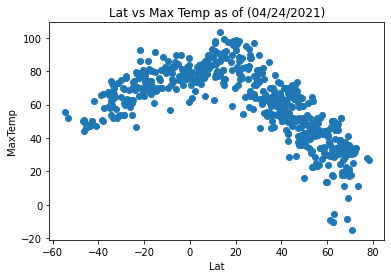

In [124]:
plt.scatter(weather["Lat"], weather["Max_Temp"])

plt.title(f"Lat vs Max Temp as of ({correct_date[0]})")
plt.ylabel("MaxTemp")
plt.xlabel("Lat")
plt.savefig("Output_Data/LatvsMaxTemp.png")

## Latitude vs. Humidity Plot

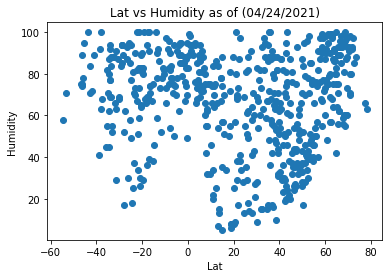

In [125]:
plt.scatter(weather["Lat"], weather["Humidity"])

plt.title(f"Lat vs Humidity as of ({correct_date[0]})")
plt.ylabel("Humidity")
plt.xlabel("Lat")
plt.savefig("Output_Data/LatvsHumidity.png")

## Latitude vs. Cloudiness Plot

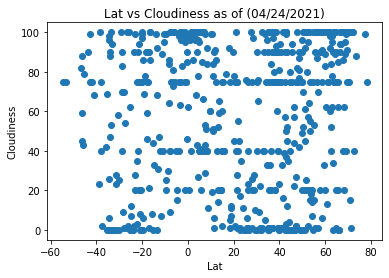

In [126]:
plt.scatter(weather["Lat"], weather["Cloudiness"])

plt.title(f"Lat vs Cloudiness as of ({correct_date[0]})")
plt.ylabel("Cloudiness")
plt.xlabel("Lat")
plt.savefig("Output_Data/LatvsCloudiness.png")

## Latitude vs. Wind Speed Plot

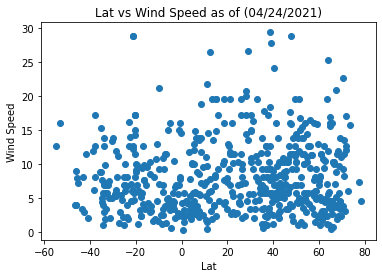

In [127]:
plt.scatter(weather["Lat"], weather["Speed"])

plt.title(f"Lat vs Wind Speed as of ({correct_date[0]})")
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.savefig("Output_Data/LatvsWindSpeed.png")

## Linear Regression

In [155]:
Northern_Hemisphere = weather.loc[weather["Lat"] >= 0]
Southern_Hemisphere = weather.loc[weather["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7155044201062302


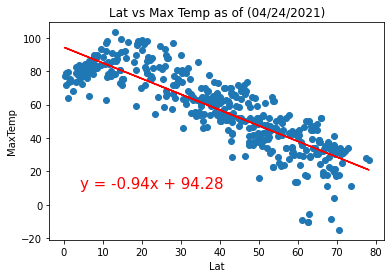

In [150]:
Lat = Northern_Hemisphere["Lat"]
Max_Temp = Northern_Hemisphere['Max_Temp']

slope, int, r, p, std_err = linregress(Lat, Max_Temp)

fit = slope * Lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(Lat, Max_Temp)

plt.title(f"Lat vs Max Temp as of ({correct_date[0]})")
plt.ylabel("MaxTemp")
plt.xlabel("Lat")
plt.plot(Lat,fit,"r-")
plt.annotate(line_eq, (4,10), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsMaxTempRegression.png")




## As we move away from the equator, temp drops. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5369017235113072


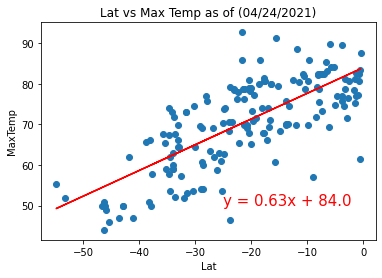

In [162]:
Lat = Southern_Hemisphere["Lat"]
Max_Temp = Southern_Hemisphere['Max_Temp']

slope, int, r, p, std_err = linregress(Lat, Max_Temp)

fit = slope * Lat + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(Lat, Max_Temp)

plt.title(f"Lat vs Max Temp as of ({correct_date[0]})")
plt.ylabel("MaxTemp")
plt.xlabel("Lat")
plt.plot(Lat,fit,"r-")
plt.annotate(line_eq, (-25,50), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsMaxTempSouthernRegression.png")




## Seems to be a positive relationship as we move towards the equator, the higher the temp. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.023729582613986458


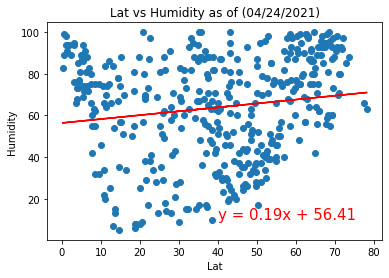

In [176]:
x_value = Northern_Hemisphere["Lat"]
y_value = Northern_Hemisphere['Humidity']

slope, int, r, p, std_err = linregress(x_value,y_value)

fit = slope * x_value + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x_value, y_value)

plt.title(f"Lat vs Humidity as of ({correct_date[0]})")
plt.ylabel("Humidity")
plt.xlabel("Lat")
plt.plot(x_value,fit,"r-")
plt.annotate(line_eq, (40,10), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsHumidityNorthernRegression.png")



## Lots more datapoints at higher humidity but seems to occur at all lattitudes of the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010057720910511355


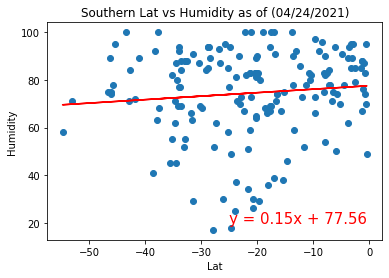

In [191]:
x_value = Southern_Hemisphere["Lat"]
y_value = Southern_Hemisphere['Humidity']

slope, int, r, p, std_err = linregress(x_value,y_value)

fit = slope * x_value + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x_value, y_value)

plt.title(f"Southern Lat vs Humidity as of ({correct_date[0]})")
plt.ylabel("Humidity")
plt.xlabel("Lat")
plt.plot(x_value,fit,"r-")
plt.annotate(line_eq, (-25,20), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsHumiditySouthernRegression.png")


## Lots more datapoints at higher humidity but seems to occur at all lattitudes of the Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02238911730823553


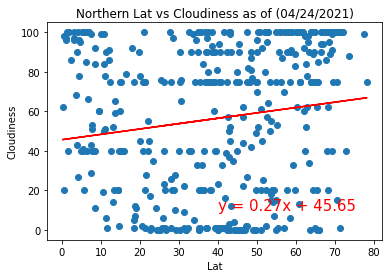

In [181]:
x_value = Northern_Hemisphere["Lat"]
y_value = Northern_Hemisphere['Cloudiness']

slope, int, r, p, std_err = linregress(x_value,y_value)

fit = slope * x_value + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x_value, y_value)

plt.title(f"Northern Lat vs Cloudiness as of ({correct_date[0]})")
plt.ylabel("Cloudiness")
plt.xlabel("Lat")
plt.plot(x_value,fit,"r-")
plt.annotate(line_eq, (40,10), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsCloudinessNorthernRegression.png")



## Cloudiness seems to not depend on latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.035231105708663425


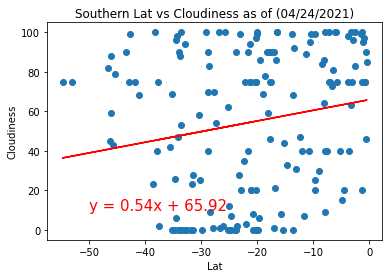

In [192]:
x_value = Southern_Hemisphere["Lat"]
y_value = Southern_Hemisphere['Cloudiness']

slope, int, r, p, std_err = linregress(x_value,y_value)

fit = slope * x_value + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x_value, y_value)

plt.title(f"Southern Lat vs Cloudiness as of ({correct_date[0]})")
plt.ylabel("Cloudiness")
plt.xlabel("Lat")
plt.plot(x_value,fit,"r-")
plt.annotate(line_eq, (-50,10), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsCloudinessSouthernRegression.png")


## Cloudiness seems to not depend on latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000151981968932238


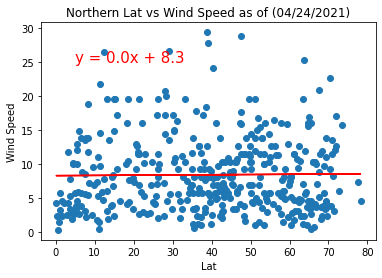

In [203]:
x_value = Northern_Hemisphere["Lat"]
y_value = Northern_Hemisphere['Speed']

slope, int, r, p, std_err = linregress(x_value,y_value)

fit = slope * x_value + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x_value, y_value)

plt.title(f"Northern Lat vs Wind Speed as of ({correct_date[0]})")
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.plot(x_value,fit,"r-")
plt.annotate(line_eq, (5,25), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsWindSpeedNorthernRegression.png")


## WInd speed not dependent on lattitude, but seems most of the Northern side stays 15 mph or lower in wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004253874834179082


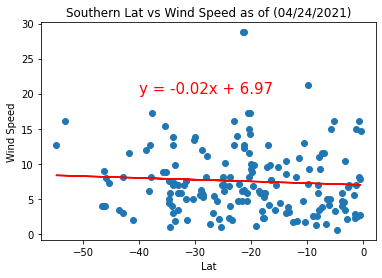

In [205]:
x_value = Southern_Hemisphere["Lat"]
y_value = Southern_Hemisphere['Speed']

slope, int, r, p, std_err = linregress(x_value,y_value)

fit = slope * x_value + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x_value, y_value)

plt.title(f"Southern Lat vs Wind Speed as of ({correct_date[0]})")
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.plot(x_value,fit,"r-")
plt.annotate(line_eq, (-40,20), fontsize=15,color="red")
print(f"The r-squared is: {r**2}")
plt.savefig("Output_Data/LatvsWindSpeedSouthernRegression.png")


## WInd speed not dependent on lattitude, but seems most of the Northern side stays 15 mph or lower in wind speed. 